In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("dark_background")

input for individual results

In [34]:
number = 1171
age    = 35

read data

In [35]:
df = pd.read_csv('output.csv', index_col=0)

df['time'] = pd.to_timedelta(df['time'])
df['time_min'] = df['time'].dt.total_seconds()/60

df

,number,age,sex,time,time_min
place,,,,,
1,11,NaN,M,0 days 01:00:50,60.833333
2,4,NaN,M,0 days 01:01:22,61.366667
3,2,23.0,M,0 days 01:01:24,61.400000
4,9,NaN,M,0 days 01:02:15,62.250000
5,5,30.0,M,0 days 01:02:19,62.316667
...,...,...,...,...,...
7322,8579,NaN,W,0 days 03:13:59,193.983333
7323,4191,NaN,M,0 days 03:16:56,196.933333
7324,2492,60.0,M,0 days 03:18:03,198.050000


overall stats

In [ ]:
N_total = len(df['number'].unique())
print(f'{N_total} finishers')

N_male = df[df['sex'] == 'M'].shape[0]
print(f'{round(N_male/N_total*100)} % male')

hours,   remainder = divmod(df['time_min'].median(), 60)
minutes, remainder = divmod(remainder, 1)
seconds = remainder * 60
print(f"median time: {int(hours)} hour, {int(minutes)} minutes, {int(seconds)} seconds")

7319 finishers
60 % male
median time: 1 hour, 57 minutes, 57 seconds


finish time distribution

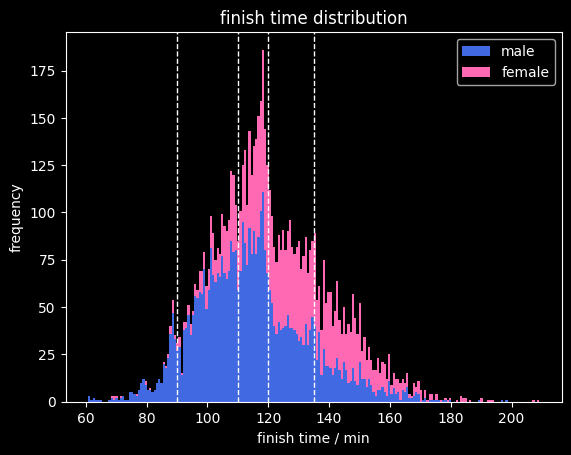

In [37]:
plt.hist([
    df.loc[df['sex'] == 'M' , 'time_min'] , 
    df.loc[df['sex'] == 'W' , 'time_min']], 
    label=['male','female'],
    color=['royalblue', 'hotpink'],
    bins=200, stacked=True)
# plt.axvline(df.loc[df['number'] == number, 'time_min'].iloc[0], color='r', linestyle='dashed', linewidth=1, label=number)
plt.axvline(60 + 30,   color='w', linestyle='dashed', linewidth=1)
plt.axvline(60 + 50,   color='w', linestyle='dashed', linewidth=1)
plt.axvline(2*60,      color='w', linestyle='dashed', linewidth=1)
plt.axvline(2*60 + 15, color='w', linestyle='dashed', linewidth=1)
# plt.axvline(df['time_min'].median(), color='w', linewidth=1, label='median')
plt.xlabel('finish time / min')
plt.ylabel('frequency')
plt.title('finish time distribution')
plt.legend()

# plt.savefig('finish_time_distribution.png', dpi=300, transparent=True)

age distribution

In [38]:
df_age_male   = df[df['sex'] == 'M'].groupby('age').agg({'time_min': 'median', 'number' : 'count'})
df_age_female = df[df['sex'] == 'W'].groupby('age').agg({'time_min': 'median', 'number' : 'count'})

df_age = pd.merge(df_age_male, df_age_female, on='age', suffixes=['_m','_f'], how='outer')

df_age['female_percentage'] = round(df_age['number_f'] / (df_age['number_m'] + df_age['number_f']) * 100 , 1)

df_age

,time_min_m,number_m,time_min_f,number_f,female_percentage
age,,,,,
18.0,115.516667,33,124.608333,12.0,26.7
20.0,106.033333,49,122.691667,30.0,38.0
23.0,108.316667,175,127.350000,197.0,53.0
30.0,112.308333,874,123.700000,553.0,38.8
35.0,111.458333,612,125.766667,309.0,33.6
40.0,110.433333,431,126.633333,247.0,36.4
45.0,113.500000,327,129.050000,208.0,38.9
50.0,114.933333,311,129.533333,139.0,30.9
55.0,118.600000,281,136.833333,125.0,30.8


Text(0.5, 1.0, 'age distribution')

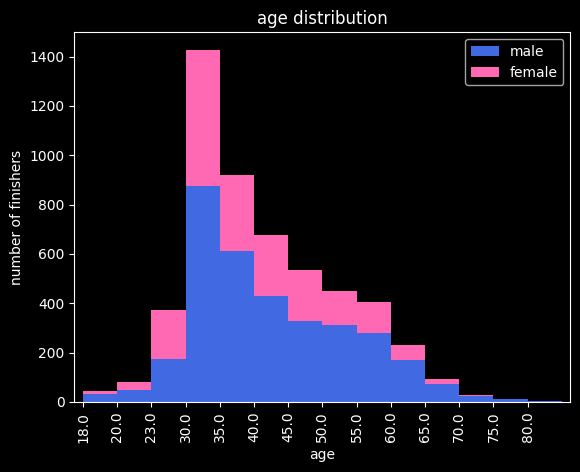

In [39]:
df_age.plot.bar(y=['number_m','number_f'], stacked=True, color=['royalblue', 'hotpink'], align='edge', width=1, label=['male','female'])
plt.ylabel('number of finishers')
plt.title('age distribution')

# plt.savefig('age_distribution.png', dpi=300, transparent=True)

Text(0.5, 1.0, 'female finishers by age')

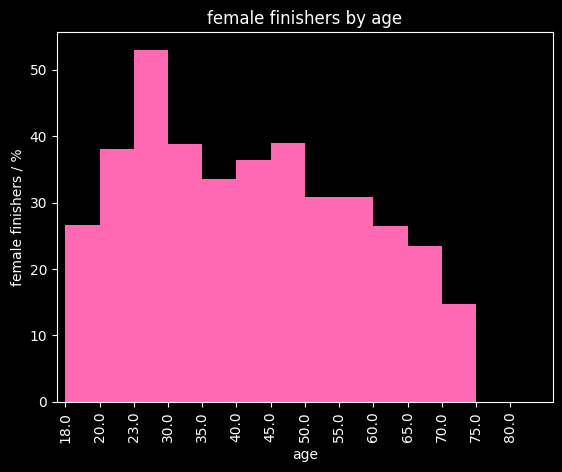

In [40]:
df_age['female_percentage'].plot.bar(color='hotpink', align='edge', width=1)
plt.ylabel('female finishers / %')
plt.title('female finishers by age')

median finish time by age

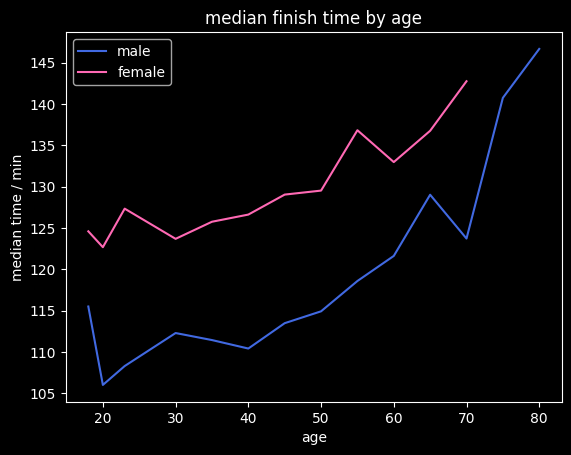

In [41]:
df_age.plot(y=['time_min_m','time_min_f'], color=['royalblue', 'hotpink'], label=['male','female'])
plt.ylabel('median time / min')
plt.title('median finish time by age')
plt.legend()

# plt.savefig('finish_time_age.png', dpi=300, transparent=True)

individual results

In [42]:
df_male = df[df['sex'] == 'M']
df_male.reset_index(drop=True, inplace=True)

position_male = df_male[df_male['number'] == number].index[0] + 1

print(f'{position_male}. of {N_male} males ({position_male/N_male*100:.2f} %)')

2254. of 4382 males (51.44 %)


In [46]:
df_male_age = df_male[df_male['age'] == age]
df_male_age.reset_index(drop=True, inplace=True)

N_male_age = df_male_age.shape[0]

position_male_age = df_male_age[df_male_age['number'] == number].index[0] + 1

print(f'{position_male_age}. of {N_male_age} males ({position_male_age/N_male_age*100:.2f} %)')

342. of 612 males (55.88 %)
